In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.cm import get_cmap

In [2]:
gm = pd.read_csv("Results/green_model")
ym = pd.read_csv("Results/yellow_model")
skb = pd.read_csv("Results/yellow_model_skb")
ppf = pd.read_csv("Results/yellow_model_ppf")

In [3]:
df = pd.concat([gm, ppf, skb, ym], axis=0).set_index('Model')
df['Execution Time'] = pd.to_datetime(df["Execution Time"], unit='s').apply(lambda x: x.strftime("%M:%S"))
df['CPU Execution Time'] = pd.to_datetime(df["CPU Execution Time"], unit='s').apply(lambda x: x.strftime("%M:%S"))
df['MSE'] = df['MSE'].round(2)
df['RMSE'] = df['RMSE'].round(2)
df['MAE'] = df['MAE'].round(2)
df['R Squared'] = df['R Squared'].round(2)
df

MSE  RMSE   MAE  R Squared  \
Model                                                                  
Green Taxi Model                        40.33  6.35  1.82       0.74   
Yellow Taxi Model with ParallelPostFit  18.15  4.26  1.21       0.90   
Yellow Taxi Model With SelectKBest      15.45  3.93  1.15       0.92   
Yellow Taxi Model                       14.41  3.80  1.04       0.92   

                                       Execution Time CPU Execution Time  
Model                                                                     
Green Taxi Model                                00:05              00:03  
Yellow Taxi Model with ParallelPostFit          00:07              00:03  
Yellow Taxi Model With SelectKBest              05:29              02:19  
Yellow Taxi Model                               09:04              03:14

Text(0.5, 1.0, 'CPU Execution Time')

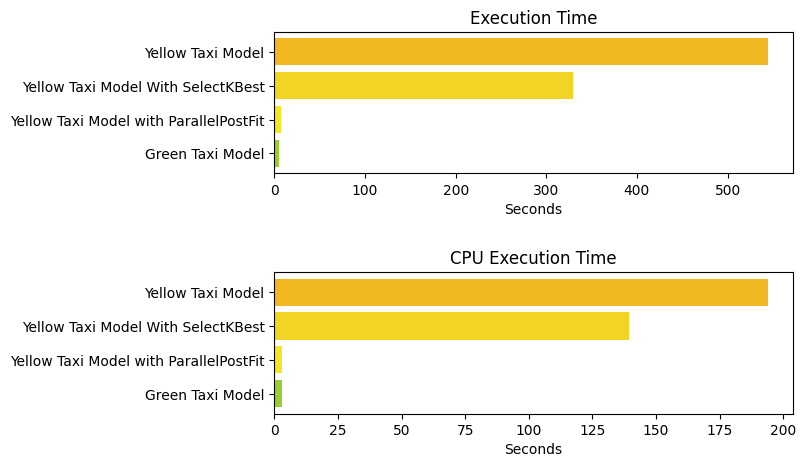

In [4]:
df_time = pd.concat([gm, ppf, skb, ym], axis=0).set_index('Model')
df_time = df_time.reset_index()

colors = ['yellowgreen','#f2e724','#f2d424','#f2b824']
fig, ax = plt.subplots(2, 1, figsize=(7,5.5))
fig.tight_layout(pad = 5)

plt.subplot(2,1,1)
plt.barh(df_time['Model'], df_time['Execution Time'], color=colors)
plt.xlabel('Seconds')
plt.title("Execution Time")

plt.subplot(2,1,2)
plt.barh(df_time['Model'], df_time['CPU Execution Time'], color=colors)
plt.xlabel('Seconds')
plt.title("CPU Execution Time")


Text(0.5, 1.0, 'R Squared (R2)')

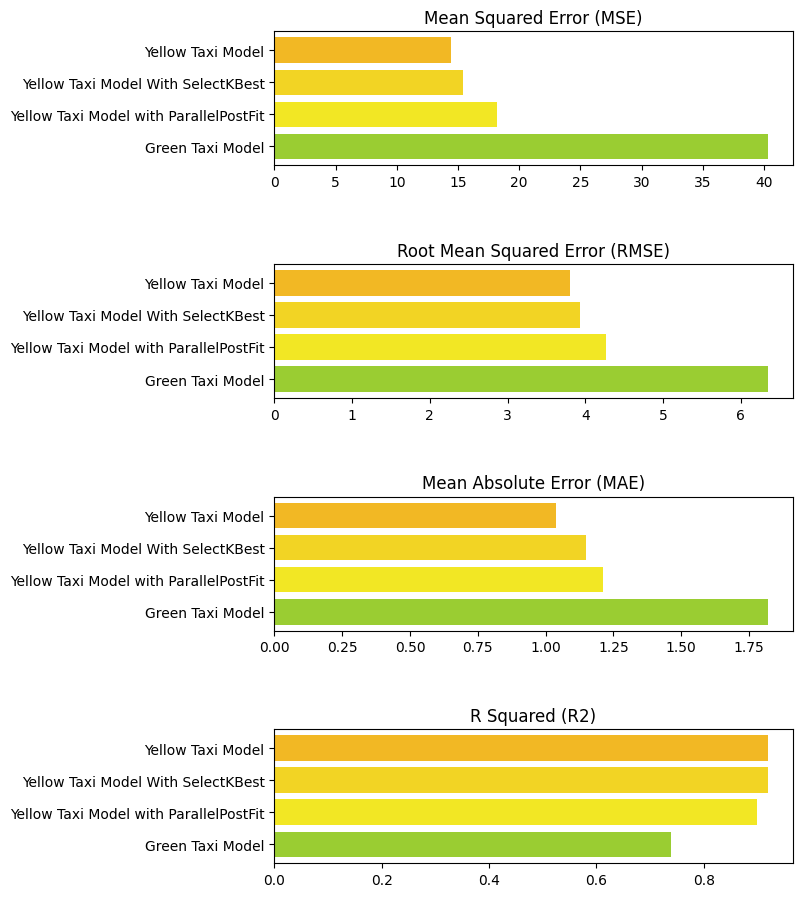

In [5]:
df_plot = df.reset_index()

colors = ['yellowgreen','#f2e724','#f2d424','#f2b824']
fig, ax = plt.subplots(4, 1, figsize=(7,10))
fig.tight_layout(pad = 5)

plt.subplot(4,1,1)
plt.barh(df_plot['Model'], df_plot['MSE'], color=colors)
plt.title("Mean Squared Error (MSE)")

plt.subplot(4,1,2)
plt.barh(df_plot['Model'], df_plot['RMSE'], color=colors)
plt.title("Root Mean Squared Error (RMSE)")

plt.subplot(4,1,3)
plt.barh(df_plot['Model'], df_plot['MAE'], color=colors)
plt.title("Mean Absolute Error (MAE)")

plt.subplot(4,1,4)
plt.barh(df_plot['Model'], df_plot['R Squared'], color=colors)
plt.title("R Squared (R2)")